In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat,savemat
from pandas import ExcelWriter
from pandas import ExcelFile



In [2]:
dataset=pd.read_csv('E:\\bastin\\CRH\\data\\weather_data_set.txt', sep='\t', header=None)

# Eliminating categorical variables from  source observations

df=dataset
df=df[df[1]!='w-1']
df=df[df[1]!='w-2']
df=df[df[1]!='w-3']
df=df[df[1]!='w-4']
df=df[df[1]!='w-5']
df=df[df[1]!='w-6']
df=df[df[1]!='w-7']
df=df[df[1]!='w-8']
df=df[df[1]!='w-9']
df=df[df[1]!='w-10']
source1=df[df[2]==1]
source2=df[df[2]==2]
source3=df[df[2]==3]
source4=df[df[2]==4]
source5=df[df[2]==5]
source6=df[df[2]==6]
source7=df[df[2]==7]
source8=df[df[2]==8]
source9=df[df[2]==9]

In [3]:
#source1
source9.fillna(0)

,0,1,2
340,8,62,9
341,9,46,9
349,29,14,9
350,30,8,9
358,50,74,9
...,...,...,...
16019,1914,42,9
16027,1916,42,9
16028,1917,38,9
16036,1919,39,9


In [4]:
# grouping observations of an id by sources into single list and these list are stored in a dictionary
id={}
for i in range(1,2101):
    id[i]=df[df[0]==i]

In [5]:
#converting string list to integer
def String_to_Integer(series):
    l=[]
    for x in series:
        l.append(int(x))
    return l
        
pred=[]
source=[]
std_dev=[]
for j in range(1,2101):
    temp=list((id[j][1]))
    pred.append(String_to_Integer(temp))
    std_dev.append(np.std(pred[j-1]))  # standard deviation of an id 
    source.append(list(id[j][2]))

C:\Users\USER\Anaconda3\envs\kesh\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\USER\Anaconda3\envs\kesh\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\USER\Anaconda3\envs\kesh\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
ground_truth=pd.read_csv('E:\\bastin\\CRH\\data\\weather_ground_truth.txt', sep='\t', header=None)
ground_truth=ground_truth.sort_values(by=0)
gt=ground_truth

#Eliminating categorical values from ground truth obsevations
gt=gt[gt[1]!='w-1']
gt=gt[gt[1]!='w-2']
gt=gt[gt[1]!='w-3']
gt=gt[gt[1]!='w-4']
gt=gt[gt[1]!='w-5']
gt=gt[gt[1]!='w-6']
gt=gt[gt[1]!='w-7']
gt=gt[gt[1]!='w-8']
gt=gt[gt[1]!='w-9']
gt=gt[gt[1]!='w-10']

In [7]:
#converting list of string into list of float
def String_to_Float(series):
    l=[]
    for x in series:
        l.append(float(x))
    return l
def dist(series,source):
    truth=series
    resultant=pd.concat([truth,source]) 
    #print(resultant)
    resultant=resultant.fillna(0) 
    #print(resultant)
    source_and_truth_id={}
    for i in range(1,2101):
        source_and_truth_id[i]=resultant[resultant[0]==i]

    vs=[]
    Source_no=[]
    for k in range(1,2101):
        value_set=list((source_and_truth_id[k][1]))
        vs.append(String_to_Float(value_set))
        Source_no.append(list(source_and_truth_id[k][2]))
        #print(Source_no)
    diff=[]
    for i in range(0,2100):
        if(len(vs[i])==2):
            diff.append(abs(vs[i][0]-vs[i][1]))
        else:
            diff.append(-1)
    distance=[]
    for j in range(0,2100):
        if(diff[j]!=-1 and std_dev[j]!= None):
            distance.append((diff[j]/std_dev[j]))
        else:
            distance.append(-1)     
    return distance        

In [8]:
dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
dist6=[]
dist7=[]
dist8=[]
dist9=[]
dist1=dist(gt,source1)

In [9]:
dist1

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 4.406602356679909,
 2.2710998958306754,
 -1,
 3.5030421561588563,
 2.923176205442531,
 -1,
 0.9236260641531167,
 1.1932426932522988,
 -1,
 1.1902039177610102,
 1.694130673873028,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.809806914982567,
 4.281149877639086,
 -1,
 1.4731077732562223,
 3.693522067506555,
 -1,
 0.6738311679542397,
 3.0186917696247164,
 -1,
 1.3546380504723798,
 4.166190448976481,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2.788500978109574,
 2.2981377516912476,
 -1,
 1.414213562373095,
 4.310527248642598,
 -1,
 2.4989961488215258,
 12.198093222338873,
 -1,
 0.5773502691896258,
 0.8846517369293827,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3.819936094322245,
 0.0,
 -1,
 2.6225201505991347,
 1.797866299901979,
 -1,
 0.0,
 0.055143684165385135,
 -1,
 0.9905339316335215,
 2.0397003109502547,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.639824499830364,
 2.2225022225033335,
 -1,
 0.323615933

In [10]:
dist2=dist(gt,source2)
dist3=dist(gt,source3)
dist4=dist(gt,source4)
dist5=dist(gt,source5)
dist6=dist(gt,source6)
dist7=dist(gt,source7)
dist8=dist(gt,source8)
dist9=dist(gt,source9)



C:\Users\USER\Anaconda3\envs\kesh\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


In [11]:
def sum_of_distances(series):
    sum_dist=0
    for i in series:
        if(i!=-1 and i!=np.inf):
            sum_dist=sum_dist+i
    return sum_dist        

In [12]:
sum1=sum_of_distances(dist1)

In [13]:
sum2=sum_of_distances(dist2)
sum3=sum_of_distances(dist3)
sum4=sum_of_distances(dist4)
sum5=sum_of_distances(dist5)
sum6=sum_of_distances(dist6)
sum7=sum_of_distances(dist7)
sum8=sum_of_distances(dist8)
sum9=sum_of_distances(dist9)

In [14]:
sum7

2218.037031804983

In [15]:
from math import log

In [16]:
s=sum1+sum2+sum3 +sum5+sum6+sum8+sum9+sum4+sum7
        
print(sum7/s)
-log(sum7/s)

0.12621987908924787


2.0697298207630586

In [17]:
def weight_of_source(series):
    sum_of_all=sum1+sum2+sum3 +sum5+sum6+sum8+sum9#+sum4+sum7
    x=series/sum_of_all
    #x = 1/(1 + np.exp(-x)) 
    #w=x
    w=-log(x)
    #w=np.abs(2.5-w)
    return w


In [18]:
w1=weight_of_source(sum1)
w2=weight_of_source(sum2)
w3=weight_of_source(sum3)
w4=weight_of_source(sum4)
w5=weight_of_source(sum5)
w6=weight_of_source(sum6)
w7=weight_of_source(sum7)
w8=weight_of_source(sum8)
w9=weight_of_source(sum9)


In [19]:
y=[w1,w2,w3,w4,w5,w6,w7,w8,w9]
print (y)

[2.035647640090763, 2.0480571063863757, 2.024260694375526, 1.871661362326132, 1.956554611060573, 2.004715539647712, 1.7916836878170077, 1.816870348659352, 1.7734250367819748]


In [20]:
from matplotlib import pyplot as plt

In [21]:
x=[1,2,3,4,5,6,7,8,9]
print (x)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0, 0.5, 'weight')

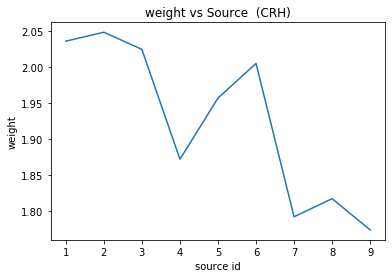

In [22]:

plt.plot(x,y)
plt.title("weight vs Source  (CRH)")
plt.xlabel('source id')
plt.ylabel('weight')

In [23]:
sum_s=0
q=int(len(dist4))
for i in range(0,q):
    if(dist4[i]!=-1 and dist4[i]!=np.inf):
        dist4[i]=round(dist4[i],4)
        print(dist4[i])
        sum_s=sum_s+dist4[i]
   

12.0
6.0
2.1213
4.6868
0.3033
2.2283
1.2083
0.0
0.6434
5.0112
2.3231
0.9944
0.2435
0.1882
1.0
2.0
0.7698
2.4
1.4003
0.3333
1.4478
2.1406
0.9275
3.6935
1.4225
4.528
1.778
3.2404
1.0
10.0
0.0
2.0
0.3658
5.3732
0.8873
3.0642
0.0
4.3105
0.1922
12.1981
0.5774
0.0
2.0
14.0
0.0873
4.1569
0.6843
3.2967
2.5466
2.4268
0.0
4.3149
1.6022
2.702
0.8254
1.7483
0.3333
1.4
0.7589
0.2357
0.2281
1.6398
4.445
1.4023
1.3311
0.5823
0.5019
0.4899
1.8162
12.0
9.2
4.6188
0.0
2.1131
3.9291
0.6542
0.6368
0.3247
0.8341
1.163
4.1884
0.4254
4.2175
3.0
2.5
3.5777
0.7213
1.0106
1.3887
2.0513
0.5085
0.4854
1.0859
0.4621
2.0156
0.2402
1.6641
2.2
7.7
1.22
2.25
0.8433
7.5684
0.9342
0.5605
2.8577
0.258
1.6936
4.8215
1.8077
1.7713
3.3333
4.3333
3.266
2.7649
0.0
0.937
1.3234
1.4561
2.8174
1.6559
1.3795
1.8676
1.6809
0.8571
0.0
0.2667
4.5883
0.8165
1.0252
1.3472
1.2005
4.3149
1.0875
1.029
0.8847
1.7575
0.5572
4.0
0.8
3.4641
0.4824
0.0
4.3656
1.5566
1.6007
5.5178
2.0
3.4484
2.5205
1.5185
1.7851
0.3333
1.28
0.6306
0.0
5.6299
1

In [24]:
#dist4
print(sum_s)

2047.550400000002


In [25]:
len(dist4)/13

161.53846153846155

In [26]:
print(dist4[161:175])

[0.258, -1, 1.6936, 4.8215, -1, 1.8077, 1.7713, -1, inf, 3.3333, -1, 4.3333, 3.266, -1]


In [27]:
#source1.to_excel(r'E:\\Source_observation1.xlsx',sheet_name='Source1')

In [28]:
#source2.to_excel(r'E:\\Source_observation2.xlsx',sheet_name='Source2')

In [29]:
'''
source3.to_excel(r'E:\\Source_observation3.xlsx',sheet_name='Source3')
source4.to_excel(r'E:\\Source_observation4.xlsx',sheet_name='Source4')
source5.to_excel(r'E:\\Source_observation5.xlsx',sheet_name='Source5')
source6.to_excel(r'E:\\Source_observation6.xlsx',sheet_name='Source6')
source7.to_excel(r'E:\\Source_observation7.xlsx',sheet_name='Source7')
source8.to_excel(r'E:\\Source_observation8.xlsx',sheet_name='Source8')
source9.to_excel(r'E:\\Source_observation9.xlsx',sheet_name='Source9')
'''

"\nsource3.to_excel(r'E:\\Source_observation3.xlsx',sheet_name='Source3')\nsource4.to_excel(r'E:\\Source_observation4.xlsx',sheet_name='Source4')\nsource5.to_excel(r'E:\\Source_observation5.xlsx',sheet_name='Source5')\nsource6.to_excel(r'E:\\Source_observation6.xlsx',sheet_name='Source6')\nsource7.to_excel(r'E:\\Source_observation7.xlsx',sheet_name='Source7')\nsource8.to_excel(r'E:\\Source_observation8.xlsx',sheet_name='Source8')\nsource9.to_excel(r'E:\\Source_observation9.xlsx',sheet_name='Source9')\n"

In [30]:
len (dist2)
#len(crh_truth_computation)

2100

In [31]:
crh_truth_computation=[]
for i in range(0,2100):
    if (dist1[i]>=0 and dist2[i]>=0 and dist3[i]>=0 and dist4[i]>=0 and dist5[i]>=0 and dist6[i] >=0 and dist7[i]>=0 and dist8[i]>=0 and dist9[i]>=0):
        crh_truth_computation.append((dist1[i]*w1+ dist2[i]*w2 + dist3[i]*w3 + dist4[i]*w4 
                                 +dist5[i]*w5 + dist6[i]*w6 + dist7[i]*w7 +dist8[i]*w8 +dist9[i]*w9
                                 )/(w1+w2+w3+w4+w5+w6+w7+w8+w9))
    else:
        crh_truth_computation.append(-1)

In [32]:
dist2

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3.026437781171257,
 2.923176205442531,
 -1,
 0.3638526919391061,
 1.5909902576697317,
 -1,
 1.46070480816124,
 2.447077640038818,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2.56429871640898,
 3.693522067506555,
 -1,
 0.074870129772693,
 4.528037654437075,
 -1,
 0.5079892689271422,
 2.7774602993176543,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.414213562373095,
 4.310527248642598,
 -1,
 2.4989961488215258,
 10.321463495825201,
 -1,
 1.4433756729740645,
 0.8846517369293827,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3.0596068423656573,
 1.797866299901979,
 -1,
 0.0,
 0.055143684165385135,
 -1,
 0.9905339316335215,
 3.78801486319333,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3.559775273805915,
 0.5324466605117774,
 -1,
 1.3586929423633294,
 1.5058207436395332,
 -1,
 0.4898979485566426,
 2.118919301088384,
 -1,
 -1,
 -1,
 -1,
 -1,


In [33]:
len(crh_truth_computation)

2100

In [34]:
gt

,0,1
1,2,70.0
2,3,30
61,5,70.5
62,6,32
120,8,70.9
...,...,...
1732,1734,41.0
1734,1736,57
1735,1737,46
1737,1739,48


In [35]:
crh_truth_computation


[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.013546953515738,
 0.9612185415830571,
 -1,
 0.8428891345554391,
 0.8091718325289078,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.2398050978020252,
 3.4311183366346514,
 -1,
 1.9584715238079269,
 3.206987593823356,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2.1060153200686105,
 11.663362653427772,
 -1,
 1.1467550993111915,
 1.0253609245326545,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.443857888968168,
 1.2953212010411763,
 -1,
 1.0657285731568344,
 2.368494269738369,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.0153295176478099,
 1.5185170363845248,
 -1,
 1.3191058519282899,
 2.2556723459270684,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.9656663410830328,
 3.7724725212164056,
 -1,
 1.9309251724389187,
 3.26716066

In [36]:
print(len(dist1),len(dist2),len(dist3),len(dist4),len(dist5),len(dist6),len(dist7),len(dist8),len(dist1))

2100 2100 2100 2100 2100 2100 2100 2100 2100


In [37]:
dist_1=[]
dist_1=dist(gt,source1)

In [38]:
dist_1

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 4.406602356679909,
 2.2710998958306754,
 -1,
 3.5030421561588563,
 2.923176205442531,
 -1,
 0.9236260641531167,
 1.1932426932522988,
 -1,
 1.1902039177610102,
 1.694130673873028,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.809806914982567,
 4.281149877639086,
 -1,
 1.4731077732562223,
 3.693522067506555,
 -1,
 0.6738311679542397,
 3.0186917696247164,
 -1,
 1.3546380504723798,
 4.166190448976481,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2.788500978109574,
 2.2981377516912476,
 -1,
 1.414213562373095,
 4.310527248642598,
 -1,
 2.4989961488215258,
 12.198093222338873,
 -1,
 0.5773502691896258,
 0.8846517369293827,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3.819936094322245,
 0.0,
 -1,
 2.6225201505991347,
 1.797866299901979,
 -1,
 0.0,
 0.055143684165385135,
 -1,
 0.9905339316335215,
 2.0397003109502547,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1.639824499830364,
 2.2225022225033335,
 -1,
 0.323615933

In [39]:
crh_truth=gt
crh_resultant=pd.concat([crh_truth,source1,source2,source3,source4,source5,source6,source7,source8,source9]) 
print(crh_resultant)
crh_resultant=crh_resultant.fillna(0) 
print(crh_resultant)
crh_source_and_truth_id={}
for i in range(1,2101):
    crh_source_and_truth_id[i]=crh_resultant[crh_resultant[0]==i]
crh_vs=[]
crh_Source_no=[]
for k in range(1,2101):
    crh_value_set=list((crh_source_and_truth_id[k][1]))
    crh_vs.append(String_to_Float(crh_value_set))
    crh_Source_no.append(list(crh_source_and_truth_id[k][2]))
#print(Source_no)

          0     1    2
1         2  70.0  NaN
2         3    30  NaN
61        5  70.5  NaN
62        6    32  NaN
120       8  70.9  NaN
...     ...   ...  ...
16019  1914    42  9.0
16027  1916    42  9.0
16028  1917    38  9.0
16036  1919    39  9.0
16037  1920    35  9.0

[11851 rows x 3 columns]
          0     1    2
1         2  70.0  0.0
2         3    30  0.0
61        5  70.5  0.0
62        6    32  0.0
120       8  70.9  0.0
...     ...   ...  ...
16019  1914    42  9.0
16027  1916    42  9.0
16028  1917    38  9.0
16036  1919    39  9.0
16037  1920    35  9.0

[11851 rows x 3 columns]


In [40]:
crh_vs

[[],
 [70.0, 64.0, 63.0],
 [30.0, 39.0, 42.0],
 [],
 [70.5, 66.0, 66.0, 63.0, 61.0],
 [32.0, 41.0, 39.0, 43.0, 44.0],
 [],
 [70.9, 70.0, 70.0, 66.0, 65.0, 64.0, 62.0],
 [39.0, 43.0, 41.0, 45.0, 46.0, 45.0, 46.0],
 [],
 [73.4, 61.0, 70.0, 66.0, 66.0, 65.0, 63.0, 62.0],
 [39.0, 45.0, 39.0, 37.0, 39.0, 41.0, 41.0, 44.0],
 [],
 [75.7, 61.0, 63.0, 73.0, 72.0, 70.0, 68.0, 64.0, 64.0],
 [34.0, 41.0, 41.0, 46.0, 43.0, 41.0, 48.0, 44.0, 43.0],
 [],
 [59.7, 63.0, 61.0, 63.0, 68.0, 66.0, 64.0, 56.0, 60.0, 58.0],
 [37.0, 43.0, 45.0, 41.0, 32.0, 30.0, 34.0, 34.0, 33.0, 34.0],
 [],
 [52.2, 61.0, 63.0, 61.0, 54.0, 52.0, 52.0, 44.0, 43.0, 44.0],
 [28.0, 37.0, 41.0, 39.0, 27.0, 28.0, 28.0, 27.0, 29.0, 29.0],
 [],
 [21.5, 21.0, 20.0],
 [12.0, 7.0, 12.0],
 [],
 [22.0, 21.0, 21.0, 18.0, 21.0],
 [7.0, 1.0, 5.0, 4.0, 8.0],
 [],
 [17.8, 21.0, 19.0, 19.0, 16.0, 17.0, 14.0],
 [1.0, 0.0, 3.0, 5.0, 9.0, 5.0, 8.0],
 [],
 [14.0, 19.0, 18.0, 19.0, 21.0, 15.0, 17.0, 12.0],
 [0.0, 14.0, 7.0, 3.0, 5.0, 8.0, 5.0, 6.0],

In [41]:
gt

,0,1
1,2,70.0
2,3,30
61,5,70.5
62,6,32
120,8,70.9
...,...,...
1732,1734,41.0
1734,1736,57
1735,1737,46
1737,1739,48


In [42]:
truth_id={}
for i in range(1,2101):
    truth_id[i]=gt[gt[0]==i]
gt_list=[]
#gt_source=[]
for k in range(1,2101):
    gt_value_set=((truth_id[k][1]))
    gt_list.append(String_to_Float(gt_value_set))
    # gt_source.append(list(gt_dict[k][2]))    


In [43]:
print(gt_list)

[[], [70.0], [30.0], [], [70.5], [32.0], [], [70.9], [39.0], [], [73.4], [39.0], [], [75.7], [34.0], [], [59.7], [37.0], [], [52.2], [28.0], [], [21.5], [12.0], [], [22.0], [7.0], [], [17.8], [1.0], [], [14.0], [0.0], [], [16.3], [1.0], [], [22.8], [3.0], [], [22.2], [3.0], [], [79.0], [49.0], [], [79.0], [52.0], [], [82.0], [48.0], [], [83.4], [49.0], [], [81.0], [48.0], [], [85.5], [44.0], [], [84.0], [55.0], [], [64.0], [34.0], [], [64.2], [43.0], [], [73.0], [46.0], [], [70.0], [45.0], [], [70.0], [43.0], [], [64.0], [49.6], [], [57.0], [30.0], [], [63.0], [47.4], [], [68.4], [], [], [68.9], [53.5], [], [66.0], [55.0], [], [64.3], [46.0], [], [65.4], [39.0], [], [66.4], [39.0], [], [70.0], [58.6], [], [70.0], [52.0], [], [72.0], [51.3], [], [68.0], [50.8], [], [72.0], [53.0], [], [75.0], [48.0], [], [84.0], [49.3], [], [69.0], [59.0], [], [70.0], [52.0], [], [72.0], [51.0], [], [69.0], [52.0], [], [73.0], [52.0], [], [80.0], [48.0], [], [85.0], [50.0], [], [50.2], [24.3], [], [48.0

In [44]:
for i in range(0,2100):
    if(len(gt_list[i])==0): #list is empty or not
        gt_list[i]=-1
    else:
        xtemp=gt_list[i][0]
        gt_list[i]=(xtemp)

In [45]:
(gt_list)

[-1,
 70.0,
 30.0,
 -1,
 70.5,
 32.0,
 -1,
 70.9,
 39.0,
 -1,
 73.4,
 39.0,
 -1,
 75.7,
 34.0,
 -1,
 59.7,
 37.0,
 -1,
 52.2,
 28.0,
 -1,
 21.5,
 12.0,
 -1,
 22.0,
 7.0,
 -1,
 17.8,
 1.0,
 -1,
 14.0,
 0.0,
 -1,
 16.3,
 1.0,
 -1,
 22.8,
 3.0,
 -1,
 22.2,
 3.0,
 -1,
 79.0,
 49.0,
 -1,
 79.0,
 52.0,
 -1,
 82.0,
 48.0,
 -1,
 83.4,
 49.0,
 -1,
 81.0,
 48.0,
 -1,
 85.5,
 44.0,
 -1,
 84.0,
 55.0,
 -1,
 64.0,
 34.0,
 -1,
 64.2,
 43.0,
 -1,
 73.0,
 46.0,
 -1,
 70.0,
 45.0,
 -1,
 70.0,
 43.0,
 -1,
 64.0,
 49.6,
 -1,
 57.0,
 30.0,
 -1,
 63.0,
 47.4,
 -1,
 68.4,
 -1,
 -1,
 68.9,
 53.5,
 -1,
 66.0,
 55.0,
 -1,
 64.3,
 46.0,
 -1,
 65.4,
 39.0,
 -1,
 66.4,
 39.0,
 -1,
 70.0,
 58.6,
 -1,
 70.0,
 52.0,
 -1,
 72.0,
 51.3,
 -1,
 68.0,
 50.8,
 -1,
 72.0,
 53.0,
 -1,
 75.0,
 48.0,
 -1,
 84.0,
 49.3,
 -1,
 69.0,
 59.0,
 -1,
 70.0,
 52.0,
 -1,
 72.0,
 51.0,
 -1,
 69.0,
 52.0,
 -1,
 73.0,
 52.0,
 -1,
 80.0,
 48.0,
 -1,
 85.0,
 50.0,
 -1,
 50.2,
 24.3,
 -1,
 48.0,
 27.5,
 -1,
 48.2,
 24.1,
 -1,
 52.0,
 31.2,
 

In [46]:
truth_id[3]

,0,1
2,3,30


In [47]:
crh_vs[1]

[70.0, 64.0, 63.0]

In [48]:
crh_tc=[]

In [49]:
for i in range(0,2100):
    if(len(crh_vs[i])==10):
        crh_tc.append((crh_vs[i][1]*w1+ crh_vs[i][2]*w2 + crh_vs[i][3]*w3 + crh_vs[i][4]*w4 
                                 +crh_vs[i][5]*w5 + crh_vs[i][6]*w6 + crh_vs[i][7]*w7 +crh_vs[i][8]*w8 +crh_vs[i][9]*w9
                                 )/(w1+w2+w3+w4+w5+w6+w7+w8+w9))
        
    else:
        crh_tc.append(-1)
        

In [50]:
crh_tc

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 62.207813410924636,
 36.40334631552531,
 -1,
 53.03553376138367,
 31.87576456773456,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 19.5821421331818,
 9.819753721578383,
 -1,
 17.573601171022844,
 9.927878085541144,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 80.13019767754659,
 56.43011528203671,
 -1,
 81.36329534748388,
 56.62375314185271,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 61.29641731723995,
 40.4860730952015,
 -1,
 54.775635271663106,
 38.12838572671995,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 64.74732171495151,
 45.05060618831381,
 -1,
 65.32295476299487,
 46.45177927529881,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 72.2180734257416,
 56.106240877484986,
 -1,
 74.9228271616031,
 55.26498482348344,
 -1,
 -1,


In [51]:
crh_vs[17]

[37.0, 43.0, 45.0, 41.0, 32.0, 30.0, 34.0, 34.0, 33.0, 34.0]

In [52]:
sam=(crh_vs[17][1]*w1+crh_vs[17][2]*w2+crh_vs[17][3]*w3+crh_vs[17][4]*w4+crh_vs[17][5]*w5+crh_vs[17][6]*w6+crh_vs[17][7]*w7+
    crh_vs[17][8]*w8+crh_vs[17][9]*w9)

In [53]:
sam

630.6106551970859

In [54]:
weights=w1+w2+w3+w4+w5+w6+w7+w8+w9

In [55]:
weights

17.322876027145416

In [56]:
print(sam/weights)

36.40334631552531


In [57]:
gt_dict={}
for i in range(1,2101):
    gt_dict[i]=gt[gt[0]==i]

In [58]:
gt_dict

{1: Empty DataFrame
 Columns: [0, 1]
 Index: [], 2:    0     1
 1  2  70.0, 3:    0   1
 2  3  30, 4: Empty DataFrame
 Columns: [0, 1]
 Index: [], 5:     0     1
 61  5  70.5, 6:     0   1
 62  6  32, 7: Empty DataFrame
 Columns: [0, 1]
 Index: [], 8:      0     1
 120  8  70.9, 9:      0   1
 121  9  39, 10: Empty DataFrame
 Columns: [0, 1]
 Index: [], 11:       0     1
 180  11  73.4, 12:       0   1
 181  12  39, 13: Empty DataFrame
 Columns: [0, 1]
 Index: [], 14:       0     1
 240  14  75.7, 15:       0   1
 241  15  34, 16: Empty DataFrame
 Columns: [0, 1]
 Index: [], 17:       0     1
 300  17  59.7, 18:       0   1
 301  18  37, 19: Empty DataFrame
 Columns: [0, 1]
 Index: [], 20:       0     1
 360  20  52.2, 21:       0   1
 361  21  28, 22: Empty DataFrame
 Columns: [0, 1]
 Index: [], 23:     0     1
 4  23  21.5, 24:     0   1
 5  24  12, 25: Empty DataFrame
 Columns: [0, 1]
 Index: [], 26:      0     1
 64  26  22.0, 27:      0  1
 65  27  7, 28: Empty DataFrame
 Columns:

In [59]:
import sklearn.metrics as metrics

In [60]:
print(gt_list)

[-1, 70.0, 30.0, -1, 70.5, 32.0, -1, 70.9, 39.0, -1, 73.4, 39.0, -1, 75.7, 34.0, -1, 59.7, 37.0, -1, 52.2, 28.0, -1, 21.5, 12.0, -1, 22.0, 7.0, -1, 17.8, 1.0, -1, 14.0, 0.0, -1, 16.3, 1.0, -1, 22.8, 3.0, -1, 22.2, 3.0, -1, 79.0, 49.0, -1, 79.0, 52.0, -1, 82.0, 48.0, -1, 83.4, 49.0, -1, 81.0, 48.0, -1, 85.5, 44.0, -1, 84.0, 55.0, -1, 64.0, 34.0, -1, 64.2, 43.0, -1, 73.0, 46.0, -1, 70.0, 45.0, -1, 70.0, 43.0, -1, 64.0, 49.6, -1, 57.0, 30.0, -1, 63.0, 47.4, -1, 68.4, -1, -1, 68.9, 53.5, -1, 66.0, 55.0, -1, 64.3, 46.0, -1, 65.4, 39.0, -1, 66.4, 39.0, -1, 70.0, 58.6, -1, 70.0, 52.0, -1, 72.0, 51.3, -1, 68.0, 50.8, -1, 72.0, 53.0, -1, 75.0, 48.0, -1, 84.0, 49.3, -1, 69.0, 59.0, -1, 70.0, 52.0, -1, 72.0, 51.0, -1, 69.0, 52.0, -1, 73.0, 52.0, -1, 80.0, 48.0, -1, 85.0, 50.0, -1, 50.2, 24.3, -1, 48.0, 27.5, -1, 48.2, 24.1, -1, 52.0, 31.2, -1, 54.0, 26.7, -1, 57.2, 28.0, -1, 53.8, 35.8, -1, 54.0, 36.0, -1, 50.5, 39.0, -1, 52.1, 41.0, -1, 55.0, 34.0, -1, 56.5, 30.0, -1, 60.2, 33.5, -1, 52.4, 39.0,

In [61]:
print(crh_tc)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 62.207813410924636, 36.40334631552531, -1, 53.03553376138367, 31.87576456773456, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19.5821421331818, 9.819753721578383, -1, 17.573601171022844, 9.927878085541144, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 80.13019767754659, 56.43011528203671, -1, 81.36329534748388, 56.62375314185271, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 61.29641731723995, 40.4860730952015, -1, 54.775635271663106, 38.12838572671995, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 64.74732171495151, 45.05060618831381, -1, 65.32295476299487, 46.45177927529881, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 72.2180734257416, 56.106240877484986, -1, 74.9228271616031, 55.26498482348344, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 76.19733867911401, 55.253588701918794, -1, -1, -1, -1, -1, 

In [62]:
arr_x=np.array(gt_list)
arr_y=np.array(crh_tc)
print(arr_x.shape,arr_y.shape)

(2100,) (2100,)


In [63]:
#print(final)

In [64]:
final=np.vstack((arr_x,arr_y))

In [65]:
print(final.shape)
print(final)


(2, 2100)
[[-1. 70. 30. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [66]:
final=final.transpose()

In [67]:
final.shape

(2100, 2)

In [68]:
final

array([[-1., -1.],
       [70., -1.],
       [30., -1.],
       ...,
       [-1., -1.],
       [-1., -1.],
       [-1., -1.]])

In [69]:
a=np.zeros(shape=(1280,2))
j=0
for i in range(0,2100):
    if(final[i][0]==-1 or final[i][1]==-1):
        final=np.delete(final,i,axis=0)
    elif(final[i][0]==None or final[i][1]==None):
        break
    else:
        a[j]=final[i]
        j=j+1
        
#though an error occurs proceed forward with execution        

IndexError: index 1280 is out of bounds for axis 0 with size 1280

In [70]:
a_final=a[0:460,]
print(a_final)

[[ 59.7         62.20781341]
 [ 37.          36.40334632]
 [ 28.          31.87576457]
 [ 22.8         19.58214213]
 [  3.           9.81975372]
 [  3.           9.92787809]
 [ 85.5         80.13019768]
 [ 44.          56.43011528]
 [ 55.          56.62375314]
 [ 64.          61.29641732]
 [ 49.6         40.4860731 ]
 [ 30.          38.12838573]
 [ 65.4         64.74732171]
 [ 39.          45.05060619]
 [ 39.          46.45177928]
 [ 75.          72.21807343]
 [ 48.          56.10624088]
 [ 49.3         55.26498482]
 [ 50.          55.2535887 ]
 [ 35.8         31.17987515]
 [ 39.          33.47270255]
 [ 61.          57.69892579]
 [ 37.          40.74987912]
 [ 37.          35.32118317]
 [ 72.          71.08428678]
 [ 46.          53.58391222]
 [ 52.          50.00303486]
 [ 66.          70.90688777]
 [ 63.          70.88017504]
 [ 27.          35.91562565]
 [ 24.9         31.7676874 ]
 [ 63.          49.84199096]
 [ 32.2         33.22673652]
 [ 21.7         31.61956975]
 [ 59.        

In [71]:
mae = metrics.mean_absolute_error(a_final[:,0],a_final[:,1])
mse = metrics.mean_squared_error(a_final[:,0],a_final[:,1])
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(a_final[:,0],a_final[:,1])

In [72]:
print(len(gt_list))

2100


In [73]:
r2

0.89189118019264

In [74]:
from sklearn.metrics import balanced_accuracy_score

In [75]:
ypred=a_final[:,1]
y=a_final[:,0]

In [76]:
print(ypred)

[62.20781341 36.40334632 31.87576457 19.58214213  9.81975372  9.92787809
 80.13019768 56.43011528 56.62375314 61.29641732 40.4860731  38.12838573
 64.74732171 45.05060619 46.45177928 72.21807343 56.10624088 55.26498482
 55.2535887  31.17987515 33.47270255 57.69892579 40.74987912 35.32118317
 71.08428678 53.58391222 50.00303486 70.90688777 70.88017504 35.91562565
 31.7676874  49.84199096 33.22673652 31.61956975 50.83355892 32.40204818
 28.55832505 45.00180143 31.31428968 29.70641277 33.95921193 80.25270384
 55.64862441 43.58546225 72.71598183 54.58234772 52.12204442 36.7950794
 70.41212501 18.87897067 33.08979917 32.25524451 29.787648   29.41607983
 41.81586028 78.11256844 54.99546099 44.40514241 68.70730047 53.27598537
 55.12038833 65.72952978 56.99126671 43.12392201 69.19234367 16.33180867
 29.29700699 28.92804585 29.33089827 25.92269416 34.87960679 76.56765525
 53.81330496 39.20791205 67.65544427 53.37222743 49.54077065 65.98324954
 58.85688672 36.30737562 68.50072539 18.56916873 30.

In [77]:
y=y.reshape(-1,1)
ypred=ypred.reshape(-1,1)

In [78]:
mae = metrics.mean_absolute_error(y,ypred)
mse = metrics.mean_squared_error(y,ypred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y,ypred)
print("mae:",mae,"\n","mse:",mse,"\n","rmse:",rmse,"\n","r2 score:",r2)

mae: 4.666108645942527 
 mse: 33.38142396562803 
 rmse: 5.777665961755494 
 r2 score: 0.89189118019264
